# Visualizing K-Nearest Neighbors
# Qinyu Chen

In [56]:
# setting
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [3]:
# import data
data = pd.read_csv('adult.txt', sep=",", header=None)
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "wage"]
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


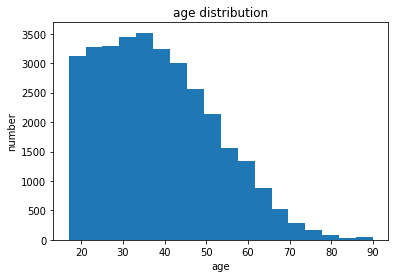

In [4]:
# first viusalization
plt.hist(data["age"], bins=18)
plt.xlabel("age")
plt.ylabel("number")
plt.title("age distribution")
plt.show()

# First visualization write-up 
The task here is to explore variable distributions of the dataset. I chose to explore the distribution of age. Since age belongs to quantitative data type, histogram plot is a good visual encoding choice for the distribution of quantitative data. (cited from lecture6, page 37, https://drive.google.com/file/d/1wt_mZZwHvpu1za0KQ0SGJ5LCykgyztA-/view)


From this visualization, I learned that this dataset is imbalanced in age distribution. So we should be careful when we make a Gaussian assumption about the data. 

Text(0, 0.5, 'hours per week')

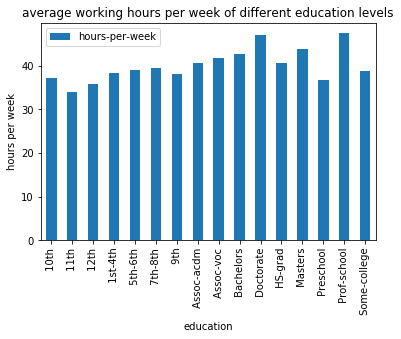

In [28]:
# second visualization
data.groupby(["education"])[["hours-per-week"]].aggregate(np.mean).plot.bar()
plt.title("average working hours per week of different education levels")
plt.ylabel("hours per week")

# Second visualization write-up
The task here is the same as the first visualization, that is, exploring the distribution of variables. I decided to examine the average working hours per week of different education levels. For the table arranging, there is only one key in the plot, so I used a bar plot for the visual encoding. (cited from lecture6, page 18, https://drive.google.com/file/d/1wt_mZZwHvpu1za0KQ0SGJ5LCykgyztA-/view)

From this visualization, I learned that there is not a significant difference in working hours per week among various education level groups. This implies that there is not much correlation between working hour per week and education level.

In [6]:
# prepare data and label
data1 = data[["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"]]
label = data["wage"]
data1.shape,label.shape

((32561, 14), (32561,))

In [7]:
# one-hot encoding for categorical features
data1_cat = data1[["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]]
data1_cat_dummies = pd.get_dummies(data1_cat)
data1_cat_dummies.head(10)

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# one-hot encoding for categorical features
label_cat_dummies = pd.get_dummies(label)
label_cat_dummies.head(10)

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,0,1


In [9]:
# standardization for continuous features
data1_con = data1[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]]
data1_con_norm = normalize(data1_con,norm="l1")
data1_con_norm.shape

(32561, 6)

In [10]:
# get preprocessed data
data1_preprocessed = np.concatenate((data1_cat_dummies,data1_con_norm),axis=1)
data1_preprocessed.shape

(32561, 108)

# How I preprocessed the data
There are both categorical features and continuous features in this dataset. For the categorical feature, I use the one-hot encoding technique to transform them into numeric features so that I can run machine learning algorithms on it. This is particularly important due to the fact that machine learning algorithms can only run on numeric features. For the continuous features, I normalized the features so that without distorting differences in the range of values, all numeric features are on the same scale. This is particularly important due to the fact that it can help eliminate data duplication and ambiguity.

In [11]:
# split the dataset randomly into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(data1_preprocessed, label_cat_dummies, test_size=0.2, random_state=0)

In [12]:
# try fit knn
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
knn.score(X_test, y_test) 

0.7894979272224781

In [25]:
# test
result2 = pd.DataFrame(grid_search.cv_results_)
result2.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.144854,0.045807,5.825915,0.109331,1,1,"{'n_neighbors': 1, 'p': 1}",0.735005,0.704327,0.720381,0.712295,0.706779,0.729848,0.723603,0.71595,0.687986,0.740574,0.717675,0.014917,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [26]:
# find the optimal hyperparameters (use "roc_auc" score as scoring)
param = {"p":[1,2], "n_neighbors":[1,2,3,4,5,6,7,8,9,10]}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param, scoring ="roc_auc", cv = 10, return_train_score=True).fit(X_train, y_train)
result = pd.DataFrame(grid_search.cv_results_)
result.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.157913,0.093091,5.956367,0.313804,1,1,"{'n_neighbors': 1, 'p': 1}",0.735005,0.704327,0.720381,0.712295,0.706779,0.729848,0.723603,0.715950,0.687986,0.740574,0.717675,0.014917,19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,1.186331,0.080075,6.622699,0.247228,1,2,"{'n_neighbors': 1, 'p': 2}",0.733376,0.708908,0.721152,0.715737,0.702908,0.724194,0.721252,0.705498,0.690686,0.736820,0.716053,0.013525,20,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,1.177262,0.107347,6.507006,0.521367,2,1,"{'n_neighbors': 2, 'p': 1}",0.792549,0.764179,0.781858,0.780984,0.775077,0.774360,0.776952,0.768475,0.759030,0.792727,0.776619,0.010477,17,0.970497,0.971188,0.970320,0.969975,0.970896,0.970223,0.970018,0.970466,0.971650,0.970545,0.970578,0.000501
3,1.170285,0.084527,7.154067,0.269553,2,2,"{'n_neighbors': 2, 'p': 2}",0.787382,0.770850,0.781544,0.780164,0.768255,0.773998,0.776237,0.771251,0.758404,0.787936,0.775602,0.008609,18,0.970277,0.970851,0.970274,0.970023,0.970654,0.970015,0.970128,0.970369,0.971638,0.970302,0.970453,0.000467
4,1.267920,0.168471,7.156761,0.645239,3,1,"{'n_neighbors': 3, 'p': 1}",0.820043,0.809505,0.815771,0.810818,0.809166,0.813234,0.809883,0.797713,0.795705,0.815748,0.809759,0.007307,15,0.952687,0.954053,0.952838,0.953119,0.953188,0.953495,0.952937,0.953594,0.954985,0.953900,0.953480,0.000658
5,1.242488,0.092418,7.682352,0.415768,3,2,"{'n_neighbors': 3, 'p': 2}",0.819328,0.811962,0.811612,0.818258,0.804659,0.810095,0.803162,0.799807,0.794809,0.814833,0.808853,0.007627,16,0.952187,0.953726,0.952960,0.952644,0.953157,0.953275,0.952362,0.953225,0.954785,0.953734,0.953205,0.000720
6,1.286376,0.197312,7.136110,0.444906,4,1,"{'n_neighbors': 4, 'p': 1}",0.838955,0.828701,0.841295,0.836388,0.824464,0.830472,0.822387,0.815698,0.814737,0.835789,0.828889,0.008931,13,0.942768,0.943074,0.942285,0.942198,0.943375,0.943425,0.943159,0.943373,0.944552,0.942974,0.943118,0.000630
7,1.188630,0.076621,7.631798,0.143225,4,2,"{'n_neighbors': 4, 'p': 2}",0.838101,0.823657,0.838807,0.837089,0.823403,0.828088,0.819035,0.815889,0.818905,0.837086,0.828006,0.008566,14,0.942308,0.942563,0.941872,0.941850,0.942724,0.943137,0.943093,0.942648,0.944228,0.942630,0.942705,0.000653
8,1.152923,0.052339,6.925985,0.185875,5,1,"{'n_neighbors': 5, 'p': 1}",0.845686,0.834833,0.848947,0.845706,0.834686,0.835599,0.836620,0.822983,0.826422,0.846405,0.837789,0.008347,12,0.935578,0.936685,0.935583,0.935466,0.936138,0.936721,0.936340,0.937160,0.937911,0.935777,0.936336,0.000754
9,1.161796,0.063122,7.735531,0.199517,5,2,"{'n_neighbors': 5, 'p': 2}",0.844348,0.834704,0.849375,0.844961,0.831960,0.836879,0.839691,0.824327,0.827851,0.848716,0.838281,0.008207,11,0.935067,0.935948,0.935015,0.935031,0.935679,0.935946,0.935750,0.936577,0.937502,0.935391,0.935791,0.000740


In [47]:
# filter out p=1
result_filtered = result[result['param_p'] == 2]
result_filtered
result_filtered2 = result_filtered[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score","split5_test_score","split6_test_score","split7_test_score","split8_test_score","split9_test_score"]]
result_filtered2
result_filtered3 = np.transpose(result_filtered2)
result_filtered3.columns = ['1', '2','3','4','5','6','7','8','9','10']
result_filtered3

,1,2,3,4,5,6,7,8,9,10
split0_test_score,0.733376,0.787382,0.819328,0.838101,0.844348,0.852368,0.855565,0.861907,0.865792,0.868177
split1_test_score,0.708908,0.770850,0.811962,0.823657,0.834704,0.838851,0.844903,0.849801,0.849469,0.851782
split2_test_score,0.721152,0.781544,0.811612,0.838807,0.849375,0.858820,0.863569,0.867370,0.873458,0.874478
split3_test_score,0.715737,0.780164,0.818258,0.837089,0.844961,0.857078,0.864063,0.863656,0.868100,0.871745
split4_test_score,0.702908,0.768255,0.804659,0.823403,0.831960,0.840766,0.846739,0.857555,0.859348,0.861222
split5_test_score,0.724194,0.773998,0.810095,0.828088,0.836879,0.846064,0.852635,0.857272,0.862220,0.864020
split6_test_score,0.721252,0.776237,0.803162,0.819035,0.839691,0.851172,0.854450,0.857777,0.863108,0.866278
split7_test_score,0.705498,0.771251,0.799807,0.815889,0.824327,0.830284,0.837574,0.842437,0.843777,0.849085
split8_test_score,0.690686,0.758404,0.794809,0.818905,0.827851,0.833138,0.841687,0.848206,0.854193,0.853750
split9_test_score,0.736820,0.787936,0.814833,0.837086,0.848716,0.854524,0.861082,0.867423,0.869491,0.872598


Text(0.5, 0, 'n_neighbors')

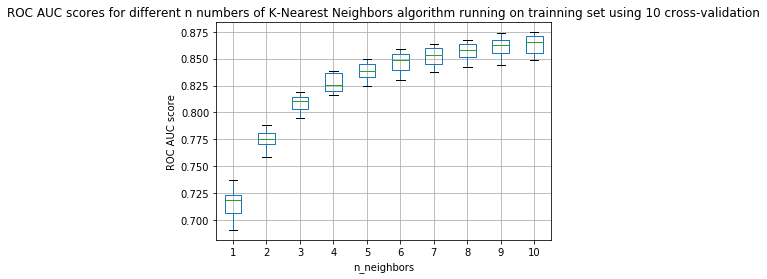

In [51]:
# third visualization
result_filtered3.boxplot()
plt.title("ROC AUC scores for different n numbers of K-Nearest Neighbors algorithm running on trainning set using 10 cross-validation")
plt.ylabel("ROC AUC score")
plt.xlabel("n_neighbors")

# Third visualization write-up
The task here is to visualize the performance of the algorithm across various values for K. A.K.A, meaning that we should find the highest ROC AUC score among using various n_neighbors parameters. I used boxplot for the visual encoding since according to lecture6, boxplot is useful for visualizing distribution among categorical feature and numeric feature. We can easily see from the plot n_neighbors = 10 is the optimal parameter. (cited from lecture6, page 36, https://drive.google.com/file/d/1wt_mZZwHvpu1za0KQ0SGJ5LCykgyztA-/view)

In [54]:
# using optimal parameters: p=2, K=10 on test set
y_pred = (grid_search.best_estimator_).predict(X_test)
y_pred

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [57]:
# using ROC AUC report performance
roc_auc_score(y_test, y_pred)

0.7253375419576986